In this notebook, we add an analysis that looks at the difference in relative theta power (not baselined) between experiment 1 and 2 too see whether theta is different between a constant or variable set size

In [1]:
%matplotlib inline
# import os

import numpy as np
import pandas as pd
# import scipy as sp
# from scipy import stats
# from scipy.stats import wilcoxon
import pingouin as pg
# import pickle as pkl

from sklearn.linear_model import LinearRegression

# from colourfulbirds import exp1_functionsforanalysis as dp
# from colourfulbirds import exp1_functionsforplotting as dp_plot
from colourfulbirds.exp1_settings import SUB_THETA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

/Users/quirine/opt/anaconda3/envs/py3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/quirine/opt/anaconda3/envs/py3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
def plotting_function(parameter, data, period, freq='THETA', zero=False, save_fig=False):

    ax = sns.violinplot(x='experiment', y=parameter, data=data, dodge=True, inner=None, palette={'exp1': '#a6cee3', 'exp2': '#b2df8a'}) # , palette=alpha_col
    ax = sns.swarmplot(x='experiment', y=parameter, data=data, dodge=True, color='black')

    # Add mean lines
    sns.boxplot(showmeans=True,
        meanline=True,
        meanprops={'color': 'k', 'ls': '-', 'lw': 3},
        medianprops={'visible': False},
        whiskerprops={'visible': False},
        zorder=10,
        x='experiment',
        y=parameter,
        # hue='lateralization',
        data=data,
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax)
    
    if zero:
        ax.axhline(y = 0, color = 'k', ls = '--', lw=2)

    if parameter == 'power':
        if freq == 'THETA':
            plt.ylabel('θ oscillation power ($\mu$V$^2$)')
        else:
            plt.ylabel('α oscillation power ($\mu$V$^2$)')
    elif parameter == 'exponent':
        plt.ylabel('exponent ($\mu$V$^2$/Hz)')
    plt.title(period)

    plt.show()

    if save_fig:
        # create correct filename and path according to parameter
        path = '../figures/combined_figures/'
        filename = 'figx_exp1_vs2_theta_' + parameter + '_' + period +'.pdf'
        plt.savefig(path + filename, format='pdf', bbox_inches='tight' )

In [3]:
df_theta_exp1 = pd.read_csv('../saved_files/combined_exps/exp1_theta', index_col=0)
df_theta_exp2 = pd.read_csv('../saved_files/combined_exps/exp2_theta', index_col=0)

df_alpha_exp1 = pd.read_csv('../saved_files/combined_exps/exp1_alpha', index_col=0)
df_alpha_exp2 = pd.read_csv('../saved_files/combined_exps/exp2_alpha', index_col=0)

df_theta_exp1.head()

,bas_ret_diff,sub_id,trial_n,set_size,exponent,offset,power,cf,peak_perc,bandpower,auc,auc_log_osc,auc_lin_osc,r2s,wm_capacity,osc_presence
0,bas,1.0,87.944444,1.0,1.637519,1.330820,0.219167,6.006726,78.531073,6.634227,13.362341,0.749284,9.058516,0.841722,1.903654,1.0
1,diff,1.0,87.944444,1.0,-0.058994,-0.117494,0.056197,0.075229,-4.519774,0.143127,0.753848,0.082482,1.347218,NaN,1.903654,1.0
2,ret,1.0,87.944444,1.0,1.578525,1.213326,0.275364,5.841791,74.011299,6.777354,14.116189,0.831766,10.405734,0.819137,1.903654,1.0
3,bas,1.0,87.931677,3.0,1.592106,1.245588,0.309697,6.080077,73.563218,7.389789,15.432363,0.854914,11.313300,0.829066,1.903654,1.0
4,diff,1.0,87.931677,3.0,0.065295,0.028273,-0.019226,-0.214985,0.574713,-0.597461,-1.263486,-0.059916,-1.068501,NaN,1.903654,1.0


# THETA

In [4]:
keep_cols = ['exponent', 'offset', 
    'power', 'bandpower']

df_theta_exp1_avg = df_theta_exp1.groupby(['bas_ret_diff', 'sub_id'], as_index=False)[keep_cols].mean()
df_theta_exp2_avg = df_theta_exp2.groupby(['bas_ret_diff', 'sub_id'], as_index=False)[keep_cols].mean()

# Add a column indicating the experiment the dataframe is from
df_theta_exp1_avg['experiment'] = 'exp1'
df_theta_exp2_avg['experiment'] = 'exp2'
df_theta_exp1.head()

df_theta = pd.concat([df_theta_exp1_avg, df_theta_exp2_avg])
df_theta

,bas_ret_diff,sub_id,exponent,offset,power,bandpower,experiment
0,bas,1.0,1.611323,1.282705,0.255965,6.922632,exp1
1,bas,5.0,1.219906,1.205780,0.368243,8.775462,exp1
2,bas,7.0,1.579350,1.451848,0.392127,11.090371,exp1
3,bas,10.0,1.481319,1.169225,0.303204,4.353459,exp1
4,bas,11.0,1.363551,1.387673,0.312389,10.331113,exp1
...,...,...,...,...,...,...,...
46,ret,38.0,1.152343,0.831383,0.259061,3.319627,exp2
47,ret,39.0,1.274337,1.351795,0.220408,8.099604,exp2
48,ret,40.0,1.108847,0.920630,0.391485,6.159132,exp2
49,ret,41.0,1.544886,1.286262,0.426605,7.669479,exp2


In [5]:
df_theta.groupby(['bas_ret_diff', 'experiment'])['power'].describe()

count      mean       std       min       25%  \
bas_ret_diff experiment                                                  
bas          exp1         10.0  0.355959  0.081501  0.226066  0.305500   
             exp2         17.0  0.278019  0.065505  0.134128  0.238852   
diff         exp1         10.0  0.057105  0.066378 -0.039496  0.008531   
             exp2         17.0  0.024318  0.048984 -0.049191 -0.007505   
ret          exp1         10.0  0.413064  0.125512  0.254255  0.317962   
             exp2         17.0  0.302337  0.071370  0.124298  0.259061   

                              50%       75%       max  
bas_ret_diff experiment                                
bas          exp1        0.373518  0.390723  0.476647  
             exp2        0.260524  0.322563  0.398990  
diff         exp1        0.056038  0.092281  0.154834  
             exp2        0.004185  0.062582  0.124837  
ret          exp1        0.363833  0.521975  0.631481  
             exp2        0.312137  0.337018  0.426605

### Retention period

In [6]:
exp1 = df_theta.query('bas_ret_diff=="ret" & experiment=="exp1"')['power'].values
exp2 = df_theta.query('bas_ret_diff=="ret" & experiment=="exp2"')['power'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_ret = df_theta.query('bas_ret_diff=="ret"')
print(pg.homoscedasticity(data=df_theta_ret, dv='power', group='experiment', method='levene'))

         W      pval  normal
0  0.91087  0.287021    True
          W      pval  normal
0  0.967923  0.781114    True
               W      pval  equal_var
levene  3.321784  0.080351       True


In [7]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.557155,12.494928,two-sided,0.024479,"[0.02, 0.2]",1.171654,3.463,0.806604


### Baseline period

In [8]:
exp1 = df_theta.query('bas_ret_diff=="bas" & experiment=="exp1"')['power'].values
exp2 = df_theta.query('bas_ret_diff=="bas" & experiment=="exp2"')['power'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_bas = df_theta.query('bas_ret_diff=="bas"')
print(pg.homoscedasticity(data=df_theta_bas, dv='power', group='experiment', method='levene'))



          W      pval  normal
0  0.958292  0.766236    True
          W     pval  normal
0  0.981881  0.97225    True
               W     pval  equal_var
levene  0.376718  0.54491       True


In [9]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.574296,15.851733,two-sided,0.020485,"[0.01, 0.14]",1.087395,3.561,0.746188


### Difference : retention - baseline

In [10]:
exp1 = df_theta.query('bas_ret_diff=="diff" & experiment=="exp1"')['power'].values
exp2 = df_theta.query('bas_ret_diff=="diff" & experiment=="exp2"')['power'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_diff = df_theta.query('bas_ret_diff=="diff"')
print(pg.homoscedasticity(data=df_theta_diff, dv='power', group='experiment', method='levene'))


          W      pval  normal
0  0.951763  0.689391    True
          W      pval  normal
0  0.938604  0.301999    True
               W      pval  equal_var
levene  0.674658  0.419197       True


In [11]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.359365,14.833454,two-sided,0.194339,"[-0.02, 0.08]",0.586813,0.716,0.293641


## Figures -- relative theta power difference between experiment 1 and 2

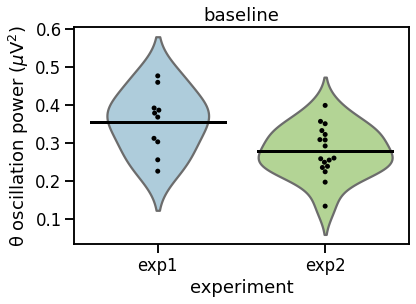

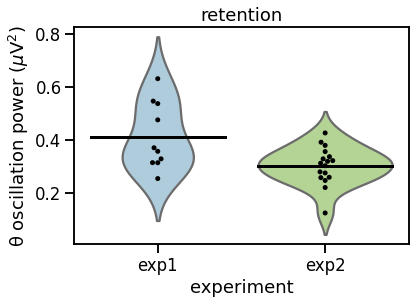

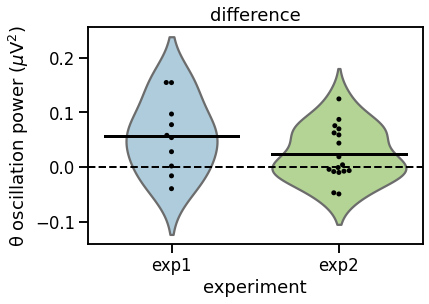

<Figure size 432x288 with 0 Axes>

In [12]:
plotting_function(parameter='power', data=df_theta_bas, period='baseline', save_fig=True)
plotting_function(parameter='power', data=df_theta_ret, period='retention', save_fig=True)
plotting_function(parameter='power', data=df_theta_diff, period='difference', zero=True, save_fig=True)

## Exponent differences between experiment 1 and 2? 

In [13]:
df_theta.groupby(['bas_ret_diff', 'experiment'])['exponent'].describe()

count      mean       std       min       25%  \
bas_ret_diff experiment                                                  
bas          exp1         10.0  1.312695  0.291906  0.570989  1.251045   
             exp2         17.0  1.223986  0.206608  0.910752  1.080517   
diff         exp1         10.0 -0.028409  0.048598 -0.098739 -0.065054   
             exp2         17.0 -0.017316  0.066523 -0.146487 -0.076143   
ret          exp1         10.0  1.284286  0.301339  0.501150  1.264817   
             exp2         17.0  1.206671  0.215012  0.896768  1.066437   

                              50%       75%       max  
bas_ret_diff experiment                                
bas          exp1        1.374411  1.457677  1.611323  
             exp2        1.182001  1.335610  1.619452  
diff         exp1       -0.023851  0.015165  0.032468  
             exp2       -0.010207  0.026483  0.100438  
ret          exp1        1.315183  1.437028  1.635813  
             exp2        1.115937  1.326109  1.626501

### Retention period

In [14]:
exp1 = df_theta.query('bas_ret_diff=="ret" & experiment=="exp1"')['exponent'].values
exp2 = df_theta.query('bas_ret_diff=="ret" & experiment=="exp2"')['exponent'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_ret = df_theta.query('bas_ret_diff=="ret"')
print(pg.homoscedasticity(data=df_theta_ret, dv='exponent', group='experiment', method='levene'))

          W      pval  normal
0  0.745976  0.003188   False
          W      pval  normal
0  0.932071  0.235673    True
               W      pval  equal_var
levene  0.001924  0.965361       True


In [15]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.714512,14.467912,two-sided,0.48628,"[-0.15, 0.31]",0.311017,0.443,0.116654


### Baseline period

In [16]:
exp1 = df_theta.query('bas_ret_diff=="bas" & experiment=="exp1"')['exponent'].values
exp2 = df_theta.query('bas_ret_diff=="bas" & experiment=="exp2"')['exponent'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_bas = df_theta.query('bas_ret_diff=="bas"')
print(pg.homoscedasticity(data=df_theta_bas, dv='exponent', group='experiment', method='levene'))



          W      pval  normal
0  0.793264  0.012007   False
          W      pval  normal
0  0.926606  0.190899    True
               W      pval  equal_var
levene  0.077763  0.782645       True


In [17]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.844579,14.383331,two-sided,0.412174,"[-0.14, 0.31]",0.368358,0.477,0.14432


### Difference : retention - baseline

In [18]:
exp1 = df_theta.query('bas_ret_diff=="diff" & experiment=="exp1"')['exponent'].values
exp2 = df_theta.query('bas_ret_diff=="diff" & experiment=="exp2"')['exponent'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_diff = df_theta.query('bas_ret_diff=="diff"')
print(pg.homoscedasticity(data=df_theta_diff, dv='exponent', group='experiment', method='levene'))


          W      pval  normal
0  0.923091  0.383461    True
          W      pval  normal
0  0.978348  0.940588    True
               W      pval  equal_var
levene  1.057315  0.313675       True


In [19]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.497838,23.627511,two-sided,0.6232,"[-0.06, 0.03]",0.182799,0.402,0.072595


### Figures for exponent comparison

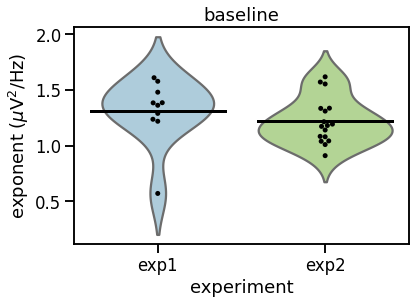

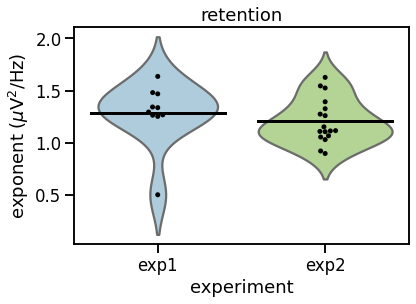

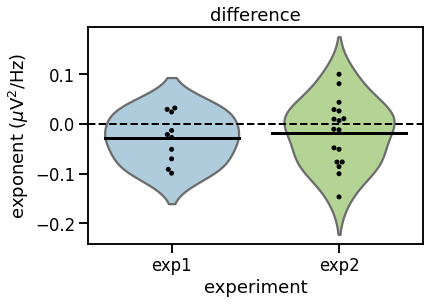

In [20]:
plotting_function(parameter='exponent', data=df_theta_bas, period='baseline', save_fig=False)
plotting_function(parameter='exponent', data=df_theta_ret, period='retention', save_fig=False)
plotting_function(parameter='exponent', data=df_theta_diff, period='difference', zero=True, save_fig=False)

## Offset differences between experiment 1 and 2? 

In [21]:
df_theta.groupby(['bas_ret_diff', 'experiment'])['offset'].describe()

count      mean       std       min       25%  \
bas_ret_diff experiment                                                  
bas          exp1         10.0  1.203055  0.258151  0.677043  1.178364   
             exp2         17.0  1.010327  0.214201  0.708019  0.806721   
diff         exp1         10.0 -0.064435  0.056000 -0.148521 -0.099759   
             exp2         17.0 -0.057609  0.086225 -0.207330 -0.111864   
ret          exp1         10.0  1.138620  0.265071  0.579406  1.110271   
             exp2         17.0  0.952718  0.238457  0.589707  0.732864   

                              50%       75%       max  
bas_ret_diff experiment                                
bas          exp1        1.243799  1.361431  1.512649  
             exp2        1.009322  1.156961  1.369067  
diff         exp1       -0.079731 -0.021960  0.015223  
             exp2       -0.034253 -0.005350  0.099710  
ret          exp1        1.235482  1.304730  1.395427  
             exp2        0.919096  1.143282  1.351795

### Retention period

In [22]:
exp1 = df_theta.query('bas_ret_diff=="ret" & experiment=="exp1"')['offset'].values
exp2 = df_theta.query('bas_ret_diff=="ret" & experiment=="exp2"')['offset'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_ret = df_theta.query('bas_ret_diff=="ret"')
print(pg.homoscedasticity(data=df_theta_ret, dv='offset', group='experiment', method='levene'))

          W      pval  normal
0  0.828321  0.031938   False
          W      pval  normal
0  0.943474  0.361731    True
               W      pval  equal_var
levene  0.126478  0.725095       True


In [23]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.825452,17.391404,two-sided,0.085155,"[-0.03, 0.4]",0.748495,1.2,0.438875


### Baseline period

In [24]:
exp1 = df_theta.query('bas_ret_diff=="bas" & experiment=="exp1"')['offset'].values
exp2 = df_theta.query('bas_ret_diff=="bas" & experiment=="exp2"')['offset'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_bas = df_theta.query('bas_ret_diff=="bas"')
print(pg.homoscedasticity(data=df_theta_bas, dv='offset', group='experiment', method='levene'))



          W      pval  normal
0  0.893072  0.183589    True
          W      pval  normal
0  0.942636  0.350787    True
               W      pval  equal_var
levene  0.029382  0.865279       True


In [25]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.991742,16.265383,two-sided,0.063464,"[-0.01, 0.4]",0.83436,1.489,0.521139


### Difference : retention - baseline

In [26]:
exp1 = df_theta.query('bas_ret_diff=="diff" & experiment=="exp1"')['offset'].values
exp2 = df_theta.query('bas_ret_diff=="diff" & experiment=="exp2"')['offset'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_theta_diff = df_theta.query('bas_ret_diff=="diff"')
print(pg.homoscedasticity(data=df_theta_diff, dv='offset', group='experiment', method='levene'))


          W      pval  normal
0  0.933898  0.487307    True
          W      pval  normal
0  0.976192  0.914726    True
               W      pval  equal_var
levene  1.296938  0.265569       True


In [27]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.2491,24.644925,two-sided,0.805348,"[-0.06, 0.05]",0.088966,0.375,0.055302


### Figures for exponent comparison

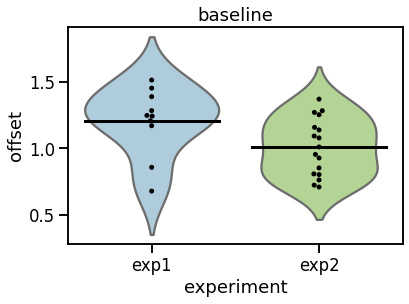

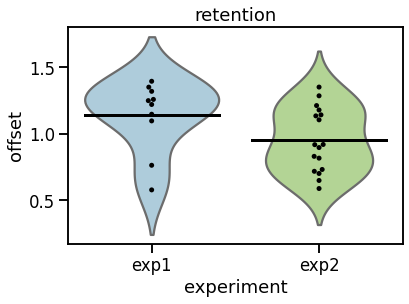

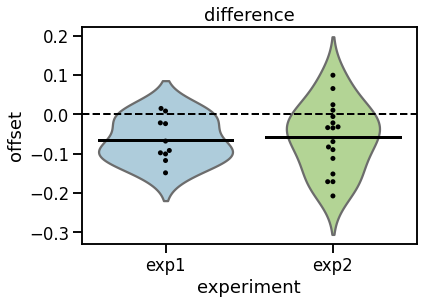

In [28]:
plotting_function(parameter='offset', data=df_theta_bas, period='baseline', save_fig=False)
plotting_function(parameter='offset', data=df_theta_ret, period='retention', save_fig=False)
plotting_function(parameter='offset', data=df_theta_diff, period='difference', zero=True, save_fig=False)

# ALPHA

In [29]:
keep_cols = ['exponent', 'offset', 
    'power', 'bandpower']

df_alpha_exp1_avg = df_alpha_exp1.groupby(['bas_ret_diff', 'sub_id'], as_index=False)[keep_cols].mean()
df_alpha_exp2_avg = df_alpha_exp2.groupby(['bas_ret_diff', 'sub_id'], as_index=False)[keep_cols].mean()

# Add a column indicating the experiment the dataframe is from
df_alpha_exp1_avg['experiment'] = 'exp1'
df_alpha_exp2_avg['experiment'] = 'exp2'
df_alpha_exp1.head()

df_alpha = pd.concat([df_alpha_exp1_avg, df_alpha_exp2_avg])
df_alpha

,bas_ret_diff,sub_id,exponent,offset,power,bandpower,experiment
0,bas,1.0,1.549387,1.096007,1.657650,17.043041,exp1
1,bas,2.0,1.302188,1.063095,0.855265,5.295419,exp1
2,bas,3.0,1.182947,0.810587,0.857721,4.278498,exp1
3,bas,4.0,1.617695,1.060883,1.840042,11.662962,exp1
4,bas,5.0,0.542945,0.349830,0.809761,3.817381,exp1
...,...,...,...,...,...,...,...
73,ret,40.0,1.538226,1.064861,0.788135,2.362761,exp2
74,ret,45.0,1.389720,1.113970,1.296968,10.399516,exp2
75,ret,46.0,0.908953,0.305147,0.315484,0.594546,exp2
76,ret,47.0,1.061414,0.634164,1.048016,3.645903,exp2


In [30]:
df_alpha.groupby(['bas_ret_diff', 'experiment'])['power'].describe()

count      mean       std       min       25%  \
bas_ret_diff experiment                                                  
bas          exp1         26.0  1.183218  0.406816  0.466425  0.855879   
             exp2         26.0  1.038089  0.425381  0.393784  0.683966   
diff         exp1         26.0 -0.092633  0.137746 -0.306970 -0.233043   
             exp2         26.0 -0.076447  0.129871 -0.343139 -0.165617   
ret          exp1         26.0  1.090584  0.376972  0.497262  0.767749   
             exp2         26.0  0.961641  0.439483  0.315484  0.664645   

                              50%       75%       max  
bas_ret_diff experiment                                
bas          exp1        1.144695  1.470286  1.930948  
             exp2        1.006834  1.295910  1.837925  
diff         exp1       -0.071701  0.014688  0.131352  
             exp2       -0.081243 -0.003519  0.256973  
ret          exp1        1.115679  1.386772  1.813026  
             exp2        0.880346  1.287590  1.676469

### Retention period

In [31]:
exp1 = df_alpha.query('bas_ret_diff=="ret" & experiment=="exp1"')['power'].values
exp2 = df_alpha.query('bas_ret_diff=="ret" & experiment=="exp2"')['power'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_alpha_ret = df_alpha.query('bas_ret_diff=="ret"')
print(pg.homoscedasticity(data=df_alpha_ret, dv='power', group='experiment', method='levene'))

          W      pval  normal
0  0.960024  0.391998    True
          W     pval  normal
0  0.930044  0.07768    True
              W     pval  equal_var
levene  0.33047  0.56796       True


In [32]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.13553,50,two-sided,0.261567,"[-0.1, 0.36]",0.314939,0.473,0.199788


### Baseline period

In [33]:
exp1 = df_alpha.query('bas_ret_diff=="bas" & experiment=="exp1"')['power'].values
exp2 = df_alpha.query('bas_ret_diff=="bas" & experiment=="exp2"')['power'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_alpha_bas = df_alpha.query('bas_ret_diff=="bas"')
print(pg.homoscedasticity(data=df_alpha_bas, dv='power', group='experiment', method='levene'))



          W      pval  normal
0  0.951549  0.252034    True
          W      pval  normal
0  0.955847  0.316405    True
               W      pval  equal_var
levene  0.000181  0.989328       True


In [34]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.25725,50,two-sided,0.214504,"[-0.09, 0.38]",0.348698,0.532,0.234381


### Difference : retention - baseline

In [35]:
exp1 = df_alpha.query('bas_ret_diff=="diff" & experiment=="exp1"')['power'].values
exp2 = df_alpha.query('bas_ret_diff=="diff" & experiment=="exp2"')['power'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_alpha_diff = df_alpha.query('bas_ret_diff=="diff"')
print(pg.homoscedasticity(data=df_alpha_diff, dv='power', group='experiment', method='levene'))


          W      pval  normal
0  0.922172  0.050566    True
         W     pval  normal
0  0.98442  0.95123    True
               W      pval  equal_var
levene  0.905402  0.345914       True


In [36]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.435949,50,two-sided,0.66475,"[-0.09, 0.06]",0.12091,0.301,0.0712


## Figures -- relative theta power difference between experiment 1 and 2

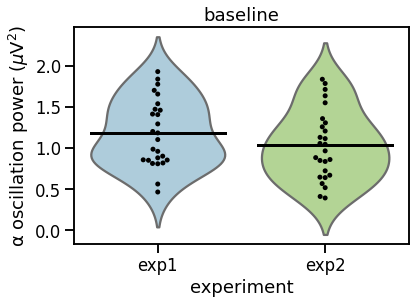

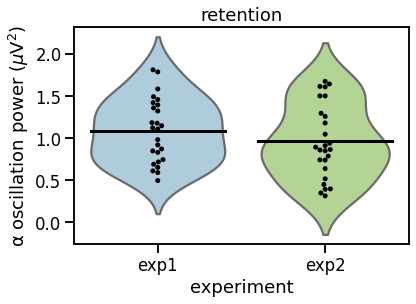

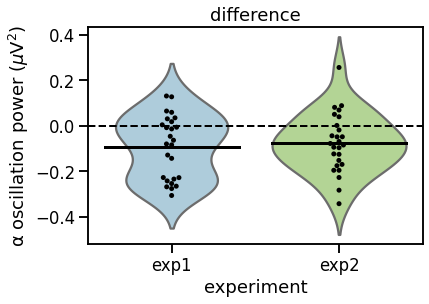

In [37]:
plotting_function(parameter='power', data=df_alpha_bas, period='baseline', freq='ALPHA', save_fig=False)
plotting_function(parameter='power', data=df_alpha_ret, period='retention', freq='ALPHA', save_fig=False)
plotting_function(parameter='power', data=df_alpha_diff, period='difference', freq='ALPHA', zero=True, save_fig=False)

## Exponent differences between experiment 1 and 2? 

In [38]:
df_alpha.groupby(['bas_ret_diff', 'experiment'])['exponent'].describe()

count      mean       std       min       25%  \
bas_ret_diff experiment                                                  
bas          exp1         26.0  1.211911  0.367919  0.420701  0.983584   
             exp2         26.0  1.166400  0.288570  0.558714  1.001543   
diff         exp1         26.0 -0.083097  0.078092 -0.261456 -0.123645   
             exp2         26.0 -0.068854  0.070408 -0.262104 -0.104999   
ret          exp1         26.0  1.128814  0.380330  0.367475  0.874275   
             exp2         26.0  1.097546  0.289167  0.453013  0.907097   

                              50%       75%       max  
bas_ret_diff experiment                                
bas          exp1        1.228709  1.494608  1.829894  
             exp2        1.192158  1.386265  1.649347  
diff         exp1       -0.063835 -0.028760  0.020750  
             exp2       -0.045779 -0.018637  0.018365  
ret          exp1        1.185974  1.439807  1.801522  
             exp2        1.119741  1.279582  1.592907

### Retention period

In [39]:
exp1 = df_alpha.query('bas_ret_diff=="ret" & experiment=="exp1"')['exponent'].values
exp2 = df_alpha.query('bas_ret_diff=="ret" & experiment=="exp2"')['exponent'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_alpha_ret = df_theta.query('bas_ret_diff=="ret"')
print(pg.homoscedasticity(data=df_alpha_ret, dv='exponent', group='experiment', method='levene'))

          W      pval  normal
0  0.973448  0.713781    True
          W      pval  normal
0  0.982046  0.914087    True
               W      pval  equal_var
levene  0.001924  0.965361       True


In [40]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.333704,50,two-sided,0.739999,"[-0.16, 0.22]",0.092553,0.291,0.062363


### Baseline period

In [41]:
exp1 = df_alpha.query('bas_ret_diff=="bas" & experiment=="exp1"')['exponent'].values
exp2 = df_alpha.query('bas_ret_diff=="bas" & experiment=="exp2"')['exponent'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_alpha_bas = df_alpha.query('bas_ret_diff=="bas"')
print(pg.homoscedasticity(data=df_alpha_bas, dv='exponent', group='experiment', method='levene'))



          W     pval  normal
0  0.970702  0.64159    True
          W      pval  normal
0  0.973917  0.726063    True
               W      pval  equal_var
levene  0.827901  0.367246       True


In [42]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.496291,50,two-sided,0.621864,"[-0.14, 0.23]",0.137646,0.308,0.077563


### Difference : retention - baseline

In [43]:
exp1 = df_alpha.query('bas_ret_diff=="diff" & experiment=="exp1"')['exponent'].values
exp2 = df_alpha.query('bas_ret_diff=="diff" & experiment=="exp2"')['exponent'].values

# Normality
print(pg.normality(exp1))
print(pg.normality(exp2))

# Equal variance
df_alpha_diff = df_alpha.query('bas_ret_diff=="diff"')
print(pg.homoscedasticity(data=df_alpha_diff, dv='exponent', group='experiment', method='levene'))


          W      pval  normal
0  0.928262  0.070455    True
          W      pval  normal
0  0.898627  0.014591   False
               W      pval  equal_var
levene  0.288642  0.593475       True


In [44]:
pg.ttest(exp1, exp2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.690697,50,two-sided,0.49295,"[-0.06, 0.03]",0.191565,0.339,0.104018


### Figures for exponent comparison

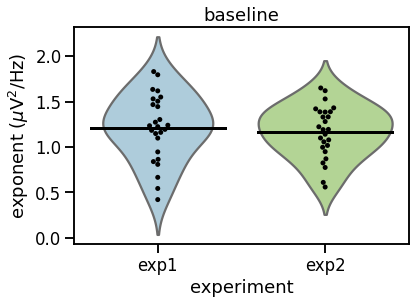

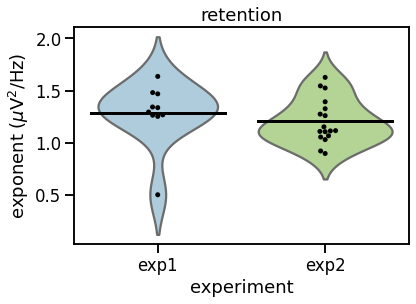

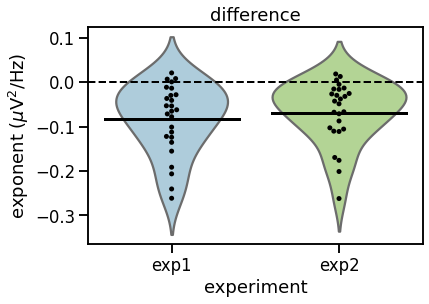

In [45]:
plotting_function(parameter='exponent', data=df_alpha_bas, period='baseline', freq='ALPHA', save_fig=False)
plotting_function(parameter='exponent', data=df_alpha_ret, period='retention', freq='ALPHA', save_fig=False)
plotting_function(parameter='exponent', data=df_alpha_diff, period='difference', freq='ALPHA', zero=True, save_fig=False)

# Regressions

In [46]:
# multiple linear regression

# I realize I have no K_scores in these dataframes

model = ols('K_avg ~ exponent', df_z_2).fit()
print(model.summary())

NameError: name 'ols' is not defined